In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [50]:
df=pd.read_csv("height-weight.csv")

In [51]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

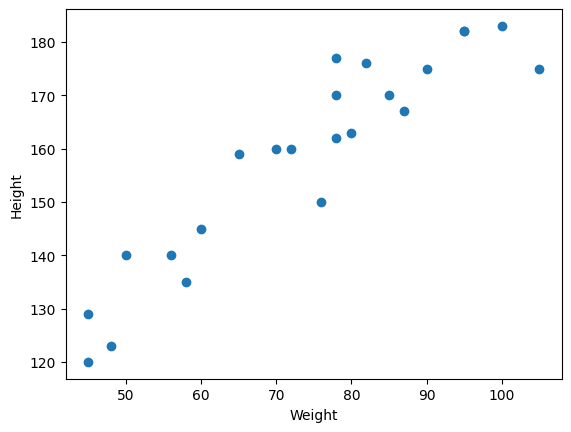

In [52]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [53]:
#correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


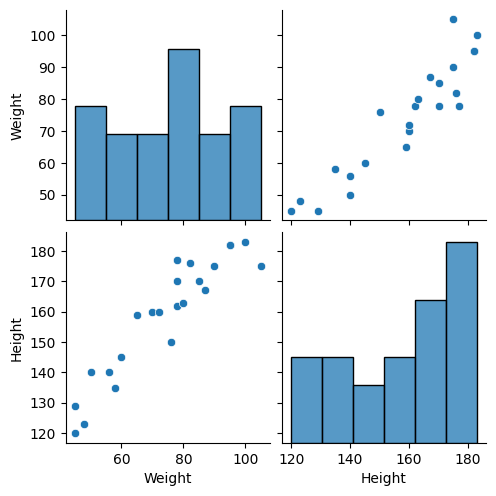

In [54]:
import seaborn as sns
sns.pairplot(df)

In [55]:
# Independent and Dependent Features
X=df[['Weight']]  ## independent features should be dataframe or 2 dimensional array
y=df['Height']

In [56]:
## Train, Test, Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [57]:
## standardization
from sklearn.preprocessing import StandardScaler

In [58]:
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)

In [59]:
X_test=scaler.transform(X_test)

In [60]:
print("Standardized X_test:\n", X_test)


Standardized X_test:
 [[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]


In [61]:
## apply simple linear regression
from sklearn.linear_model import LinearRegression

In [62]:
regression=LinearRegression(n_jobs=-1)

In [63]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [64]:
print("Coefficient or slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


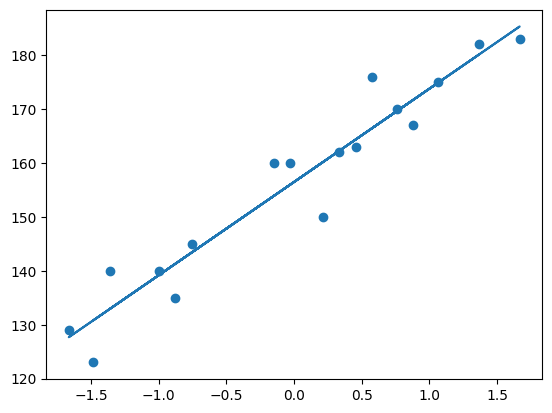

In [65]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

## Prediction of test data
1. predicted height output= intercept+coef_(Weights)
2. y_pred_test= 156.470 + 17.29(X_test)

In [66]:
## prediciton for test data
y_pred=regression.predict(X_test)

In [67]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [68]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [69]:
## prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Users\hp\Desktop\data science\ds\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])